# Example for generating figures of the progress of the learning
Figures are at the end. <br>
Note that only 10 examples are used for training.

In [1]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import torch
from collections import Counter
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
train_ids = pd.read_csv('./datasets/train_semeval_parids-labels.csv')
test_ids = pd.read_csv('./datasets/dev_semeval_parids-labels.csv')
data_pcl = pd.read_csv("./datasets/dontpatronizeme_pcl.tsv", sep="\t", skiprows=3,
                       names=['par_id','art_id','keyword','country_code','text','label'])

In [4]:
pred_texts = data_pcl['text'].tolist()

# Replace the nan value with an empty string:
for i in range(len(pred_texts)):
    if type(pred_texts[i]) != str :
        pred_texts[i] = '' 
        

n_texts = len(pred_texts)
print('len(pred_texts) =', n_texts)

# Binary labels
data_pcl['labels'] = data_pcl.label > 1.5

len(pred_texts) = 10469


In [5]:
# Seperate train and test df according to train_ids and test_ids
train_df = data_pcl.loc[data_pcl.par_id.isin(train_ids.par_id)][['text', 'labels']]
test_df = data_pcl.loc[data_pcl.par_id.isin(test_ids.par_id)][['text', 'labels']]

In [6]:
train_df

,text,labels
0,"We 're living in times of absolute insanity , ...",False
1,"In Libya today , there are countless number of...",False
2,White House press secretary Sean Spicer said t...,False
3,Council customers only signs would be displaye...,False
4,""" Just like we received migrants fleeing El Sa...",False
...,...,...
10423,""" I do n't believe in abortion , I think it is...",True
10444,More than 150 volunteers spent the night in ' ...,True
10453,""" We are challenged , I suggest , to turn this...",True
10466,""" She has one huge platform , and information ...",True


In [7]:
test_df

,text,labels
106,"His present "" chambers "" may be quite humble ,...",True
148,Krueger recently harnessed that creativity to ...,True
150,10:41am - Parents of children who died must ge...,True
153,When some people feel causing problem for some...,True
156,We are alarmed to learn of your recently circu...,True
...,...,...
10462,""" The Pakistani police came to our house and t...",False
10463,When Marie O'Donoghue went looking for a speci...,False
10464,Sri Lankan norms and culture inhibit women fro...,False
10465,He added that the AFP will continue to bank on...,False


In [8]:
task1_model_args = ClassificationArgs(num_train_epochs=20,
                                      no_save=True,
                                      no_cache=True,
                                      overwrite_output_dir=True,
                                      evaluate_during_training=True,
                                      #max_seq_length=128 #by default, it could be intresting to see if this trucates our dataset
                                     )

In [10]:
task1_model = ClassificationModel("roberta", "roberta-base",
                                  args=task1_model_args,
                                  use_cuda=torch.cuda.is_available(),
                                 )

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classi

In [23]:
# Test code on a smaller portion of the dataset
mini_train_df = train_df.loc[[0,1,2,3,4,10423,10444,10453,10466,10468]]
mini_test_df = test_df.loc[[150,153,10462,10463]]

In [24]:
mini_train_df

,text,labels
0,"We 're living in times of absolute insanity , ...",False
1,"In Libya today , there are countless number of...",False
2,White House press secretary Sean Spicer said t...,False
3,Council customers only signs would be displaye...,False
4,""" Just like we received migrants fleeing El Sa...",False
10423,""" I do n't believe in abortion , I think it is...",True
10444,More than 150 volunteers spent the night in ' ...,True
10453,""" We are challenged , I suggest , to turn this...",True
10466,""" She has one huge platform , and information ...",True
10468,""" Guinness World Record of 540lbs of 7-layer m...",True


In [25]:
mini_test_df

,text,labels
150,10:41am - Parents of children who died must ge...,True
153,When some people feel causing problem for some...,True
10462,""" The Pakistani police came to our house and t...",False
10463,When Marie O'Donoghue went looking for a speci...,False


In [26]:
# Run the model
task1_model.train_model(mini_train_df, show_running_loss=True, eval_df=mini_test_df, f1=f1_score)

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/hubzer/opt/anaconda3/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Running Epoch 0 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 1 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 2 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

/Users/hubzer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Running Epoch 3 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 4 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 5 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 6 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 7 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 8 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 9 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 10 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 11 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 12 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 13 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 14 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 15 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 16 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 17 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 18 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 19 of 20:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

(40,
 defaultdict(list,
             {'global_step': [2,
               4,
               6,
               8,
               10,
               12,
               14,
               16,
               18,
               20,
               22,
               24,
               26,
               28,
               30,
               32,
               34,
               36,
               38,
               40],
              'train_loss': [6.10166072845459,
               0.00936900358647108,
               5.169245719909668,
               0.010508142411708832,
               1.204723596572876,
               0.4422745704650879,
               0.023574907332658768,
               0.33469676971435547,
               0.19068971276283264,
               0.04030176252126694,
               0.006139382719993591,
               0.007932606153190136,
               0.007344862911850214,
               0.004652912728488445,
               0.002712985035032034,
               0.00249023735523

In [27]:
progress = pd.read_csv("./outputs/training_progress_scores.csv")

In [28]:
progress

,global_step,train_loss,mcc,tp,tn,fp,fn,auroc,auprc,f1,eval_loss
0,2,6.101661,0.57735,1,2,0,1,1.00,1.000000,0.666667,1.899221
1,4,0.009369,0.57735,1,2,0,1,1.00,1.000000,0.666667,0.950853
2,6,5.169246,0.00000,2,0,2,0,0.75,0.833333,0.666667,2.163051
3,8,0.010508,0.00000,2,0,2,0,0.75,0.833333,0.666667,1.709921
4,10,1.204724,0.00000,2,0,2,0,0.75,0.833333,0.666667,0.954630
5,12,0.442275,0.57735,1,2,0,1,1.00,1.000000,0.666667,0.479861
6,14,0.023575,0.57735,1,2,0,1,1.00,1.000000,0.666667,0.892600
7,16,0.334697,0.00000,0,2,0,2,0.50,0.750000,0.000000,1.088068
8,18,0.190690,0.57735,1,2,0,1,0.50,0.750000,0.666667,0.829921
9,20,0.040302,0.00000,1,1,1,1,0.50,0.750000,0.500000,0.728410


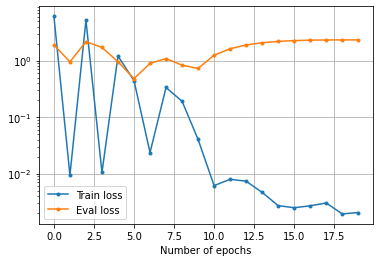

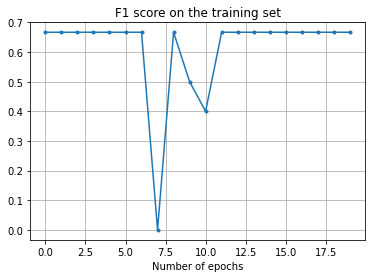

In [29]:
plt.figure(1)
plt.plot(progress['train_loss'], '.-', label='Train loss')
plt.plot(progress['eval_loss'], '.-', label='Eval loss')
plt.yscale('log')
plt.xlabel('Number of epochs')
plt.legend()
plt.grid()

plt.figure(2)
plt.title('F1 score on the training set')
plt.plot(progress['f1'], '.-')
plt.xlabel('Number of epochs')
plt.grid()

In [30]:
# Get f1 score on the test set:
result = task1_model.eval_model(mini_test_df, f1=f1_score)
result

  0%|          | 0/4 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

/Users/hubzer/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


({'mcc': 0.0,
  'tp': 2,
  'tn': 0,
  'fp': 2,
  'fn': 0,
  'auroc': 0.5,
  'auprc': 0.75,
  'f1': 0.6666666666666666,
  'eval_loss': 2.3269338607788086},
 array([[-0.88530719,  1.02169335],
        [-3.03087258,  3.41331792],
        [-1.417243  ,  1.58066499],
        [-2.88737059,  3.2315042 ]]),
 [{'guid': 2, 'text_a': '" The Pakistani police came to our house and told us to leave , " Hoji Karim , an Afghan refugee tells of his ordeal . " They threw all our things onto the street . "', 'text_b': None, 'label': False},
  {'guid': 3, 'text_a': 'When Marie O\'Donoghue went looking for a special school for her intellectually disabled son Paul in the 1990s , the Department of Education \'s response was blunt : he was , it said , " ineducable " .', 'text_b': None, 'label': False}])

In [31]:
# Check f1 score is coherent with the number of true positive, true neg, false pos, fn
precision = result[0]['tp'] / (result[0]['tp'] + result[0]['fp'])
recall = result[0]['tp'] / (result[0]['tp'] + result[0]['tn'])
f1_check = 2 * precision * recall / (precision + recall)
f1_check, precision, recall

(0.6666666666666666, 0.5, 1.0)